# Visualization and Case study

#### Uber dataset (from Kaggle.com)

In [1]:
import numpy as np
import pandas as pd

In [2]:
iris_df = pd.read_csv('iris.csv')
iris_df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0   1            6.5           3.2            5.1           2.0   
1   2            6.1           2.8            4.0           1.3   
2   3            5.1           3.5            1.4           0.3   
3   4            6.4           3.1            5.5           1.8   
4   5            6.7           3.1            4.7           1.5   

           Species  
0   Iris-virginica  
1  Iris-versicolor  
2      Iris-setosa  
3   Iris-virginica  
4  Iris-versicolor

In [3]:
iris_df.tail()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            4.6           3.6            1.0           0.2   
146  147            5.0           3.3            1.4           0.2   
147  148            6.0           3.0            4.8           1.8   
148  149            6.7           3.1            5.6           2.4   
149  150            5.3           3.7            1.5           0.2   

            Species  
145     Iris-setosa  
146     Iris-setosa  
147  Iris-virginica  
148  Iris-virginica  
149     Iris-setosa

In [4]:
# Remove the id columns as it doesn't contribute towards the data
iris_df.drop('Id', axis=1, inplace=True)
iris_df

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
0              6.5           3.2            5.1           2.0   Iris-virginica
1              6.1           2.8            4.0           1.3  Iris-versicolor
2              5.1           3.5            1.4           0.3      Iris-setosa
3              6.4           3.1            5.5           1.8   Iris-virginica
4              6.7           3.1            4.7           1.5  Iris-versicolor
..             ...           ...            ...           ...              ...
145            4.6           3.6            1.0           0.2      Iris-setosa
146            5.0           3.3            1.4           0.2      Iris-setosa
147            6.0           3.0            4.8           1.8   Iris-virginica
148            6.7           3.1            5.6           2.4   Iris-virginica
149            5.3           3.7            1.5           0.2      Iris-setosa

[150 rows x 5 columns]

### Univariate Analysis

In [5]:
iris_df.shape

(150, 5)

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_df.describe().T

count      mean       std  min  25%   50%  75%  max
SepalLengthCm  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
SepalWidthCm   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
PetalLengthCm  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
PetalWidthCm   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5

In [8]:
iris_df.isnull().sum()

# Purpose column has a lot of Null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Mapping labels to numerical classes

In [9]:
iris_df['Species'].unique()

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [10]:
iris_df['Species'] = iris_df['Species'].map({ 'Iris-virginica': 1, 'Iris-versicolor': 2, 'Iris-setosa': 3 })
iris_df

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              6.5           3.2            5.1           2.0        1
1              6.1           2.8            4.0           1.3        2
2              5.1           3.5            1.4           0.3        3
3              6.4           3.1            5.5           1.8        1
4              6.7           3.1            4.7           1.5        2
..             ...           ...            ...           ...      ...
145            4.6           3.6            1.0           0.2        3
146            5.0           3.3            1.4           0.2        3
147            6.0           3.0            4.8           1.8        1
148            6.7           3.1            5.6           2.4        1
149            5.3           3.7            1.5           0.2        3

[150 rows x 5 columns]

#### Checking the skewness

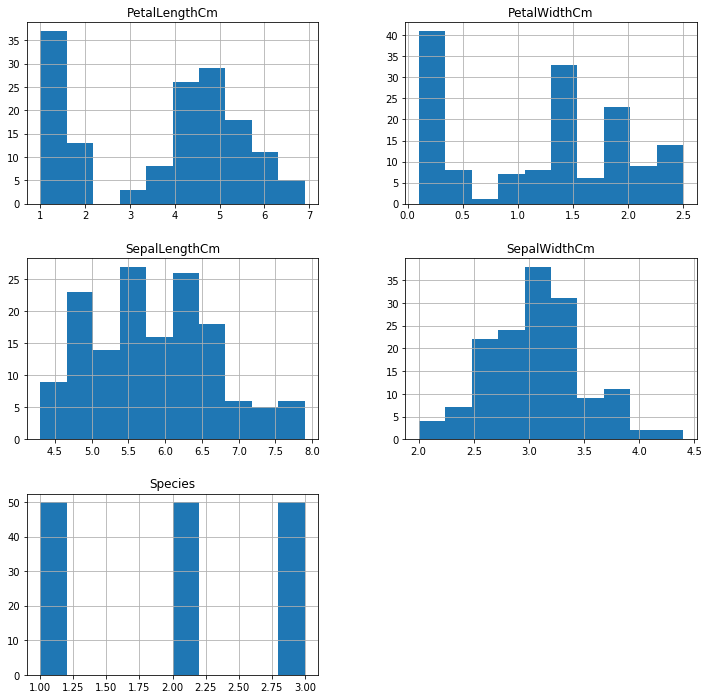

In [11]:
import matplotlib.pyplot as plt

iris_df.hist(figsize=(12,12))
plt.show();

### Multivariate analysis
#### Pearson's correlation coefficient

In [12]:
iris_df_corr = iris_df.corr('pearson')['Species']
iris_df_corr_valuable = iris_df_corr[ (iris_df_corr >= 0.3) | (iris_df_corr <= -0.2)]
iris_df_corr_valuable

SepalLengthCm   -0.782561
SepalWidthCm     0.419446
PetalLengthCm   -0.949043
PetalWidthCm    -0.956464
Species          1.000000
Name: Species, dtype: float64

#### Pairplot the data to visualize the relatioship

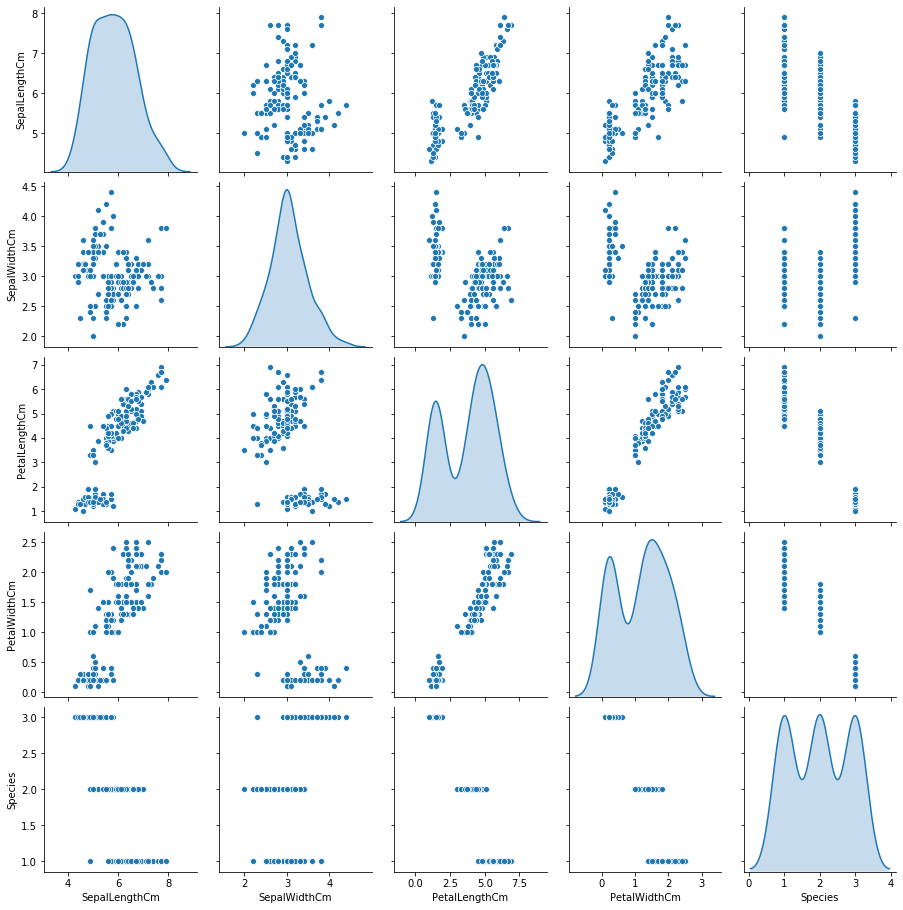

In [13]:
import seaborn as sns

sns.pairplot(iris_df, diag_kind='kde')
plt.show();

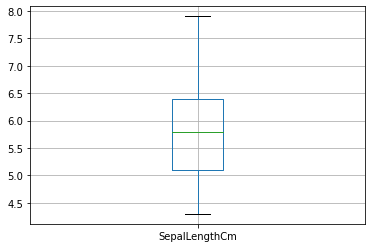

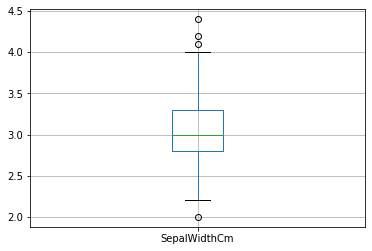

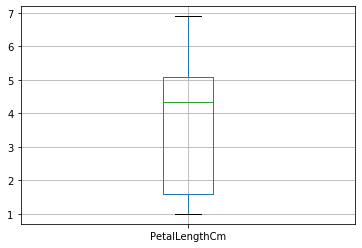

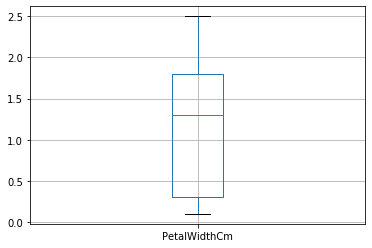

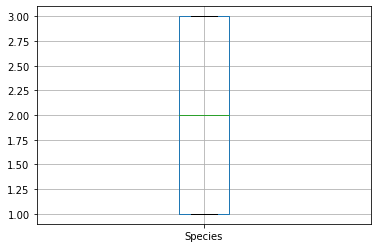

In [14]:
for colname in iris_df.columns:
    iris_df[[colname]].boxplot();
    plt.show();